In [1]:
from scipy.spatial import distance as dist
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np

import argparse
import imutils
import time
import dlib
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:

def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)

    # return the eye aspect ratio
    return ear

In [3]:
 
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold for to set off the
# alarm
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 48

# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off
COUNTER = 0
ALARM_ON = False

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

[INFO] loading facial landmark predictor...


In [4]:
ls

alarm.wav*             shape_predictor_68_face_landmarks.dat*
awake.JPG*             sleepyawake.mp4*
detect_drowsiness.py*  tireness_detector.html
drowsy.jpg*            tireness_detector.ipynb*


In [5]:
# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
image = cv2.imread('/data/home/zeno/Desktop/drowsiness-detection/awake.JPG')
image2 = cv2.imread('/data/home/zeno/Desktop/drowsiness-detection/drowsy.jpg')
image.shape , image2.shape

((677, 444, 3), (630, 445, 3))

In [6]:
def drowsyness_detector(img):
    COUNTER = 0
    ALARM_ON = False
    frame = imutils.resize(img, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale frame
    rects = detector(gray, 0)

    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # extract the left and right eye coordinates, then use the
        # coordinates to compute the eye aspect ratio for both eyes
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        # average the eye aspect ratio together for both eyes
        ear = (leftEAR + rightEAR) / 2.0

        # compute the convex hull for the left and right eye, then
        # visualize each of the eyes
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        # check to see if the eye aspect ratio is below the blink
        # threshold, and if so, increment the blink frame counter
        if ear < EYE_AR_THRESH:
            COUNTER += 1

            # if the eyes were closed for a sufficient number of
            # then sound the alarm
            # if COUNTER >= EYE_AR_CONSEC_FRAMES: # only use in live video
                # if the alarm is not on, turn it on
            if 45 >= EYE_AR_CONSEC_FRAMES:
                if not ALARM_ON:
                    ALARM_ON = True

                    # check to see if an alarm file was supplied,
                    # and if so, start a thread to have the alarm
                    # sound played in the background
                    print("ALARM , tireness detected !")

                # draw an alarm on the frame
                cv2.putText(frame, "DROWSINESS ALERT!", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # otherwise, the eye aspect ratio is not below the blink
        # threshold, so reset the counter and alarm
        else:
            COUNTER = 0
            ALARM_ON = False

        # draw the computed eye aspect ratio on the frame to help
        # with debugging and setting the correct eye aspect ratio
        # thresholds and frame counters
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    return frame
    

ALARM , tireness detected !


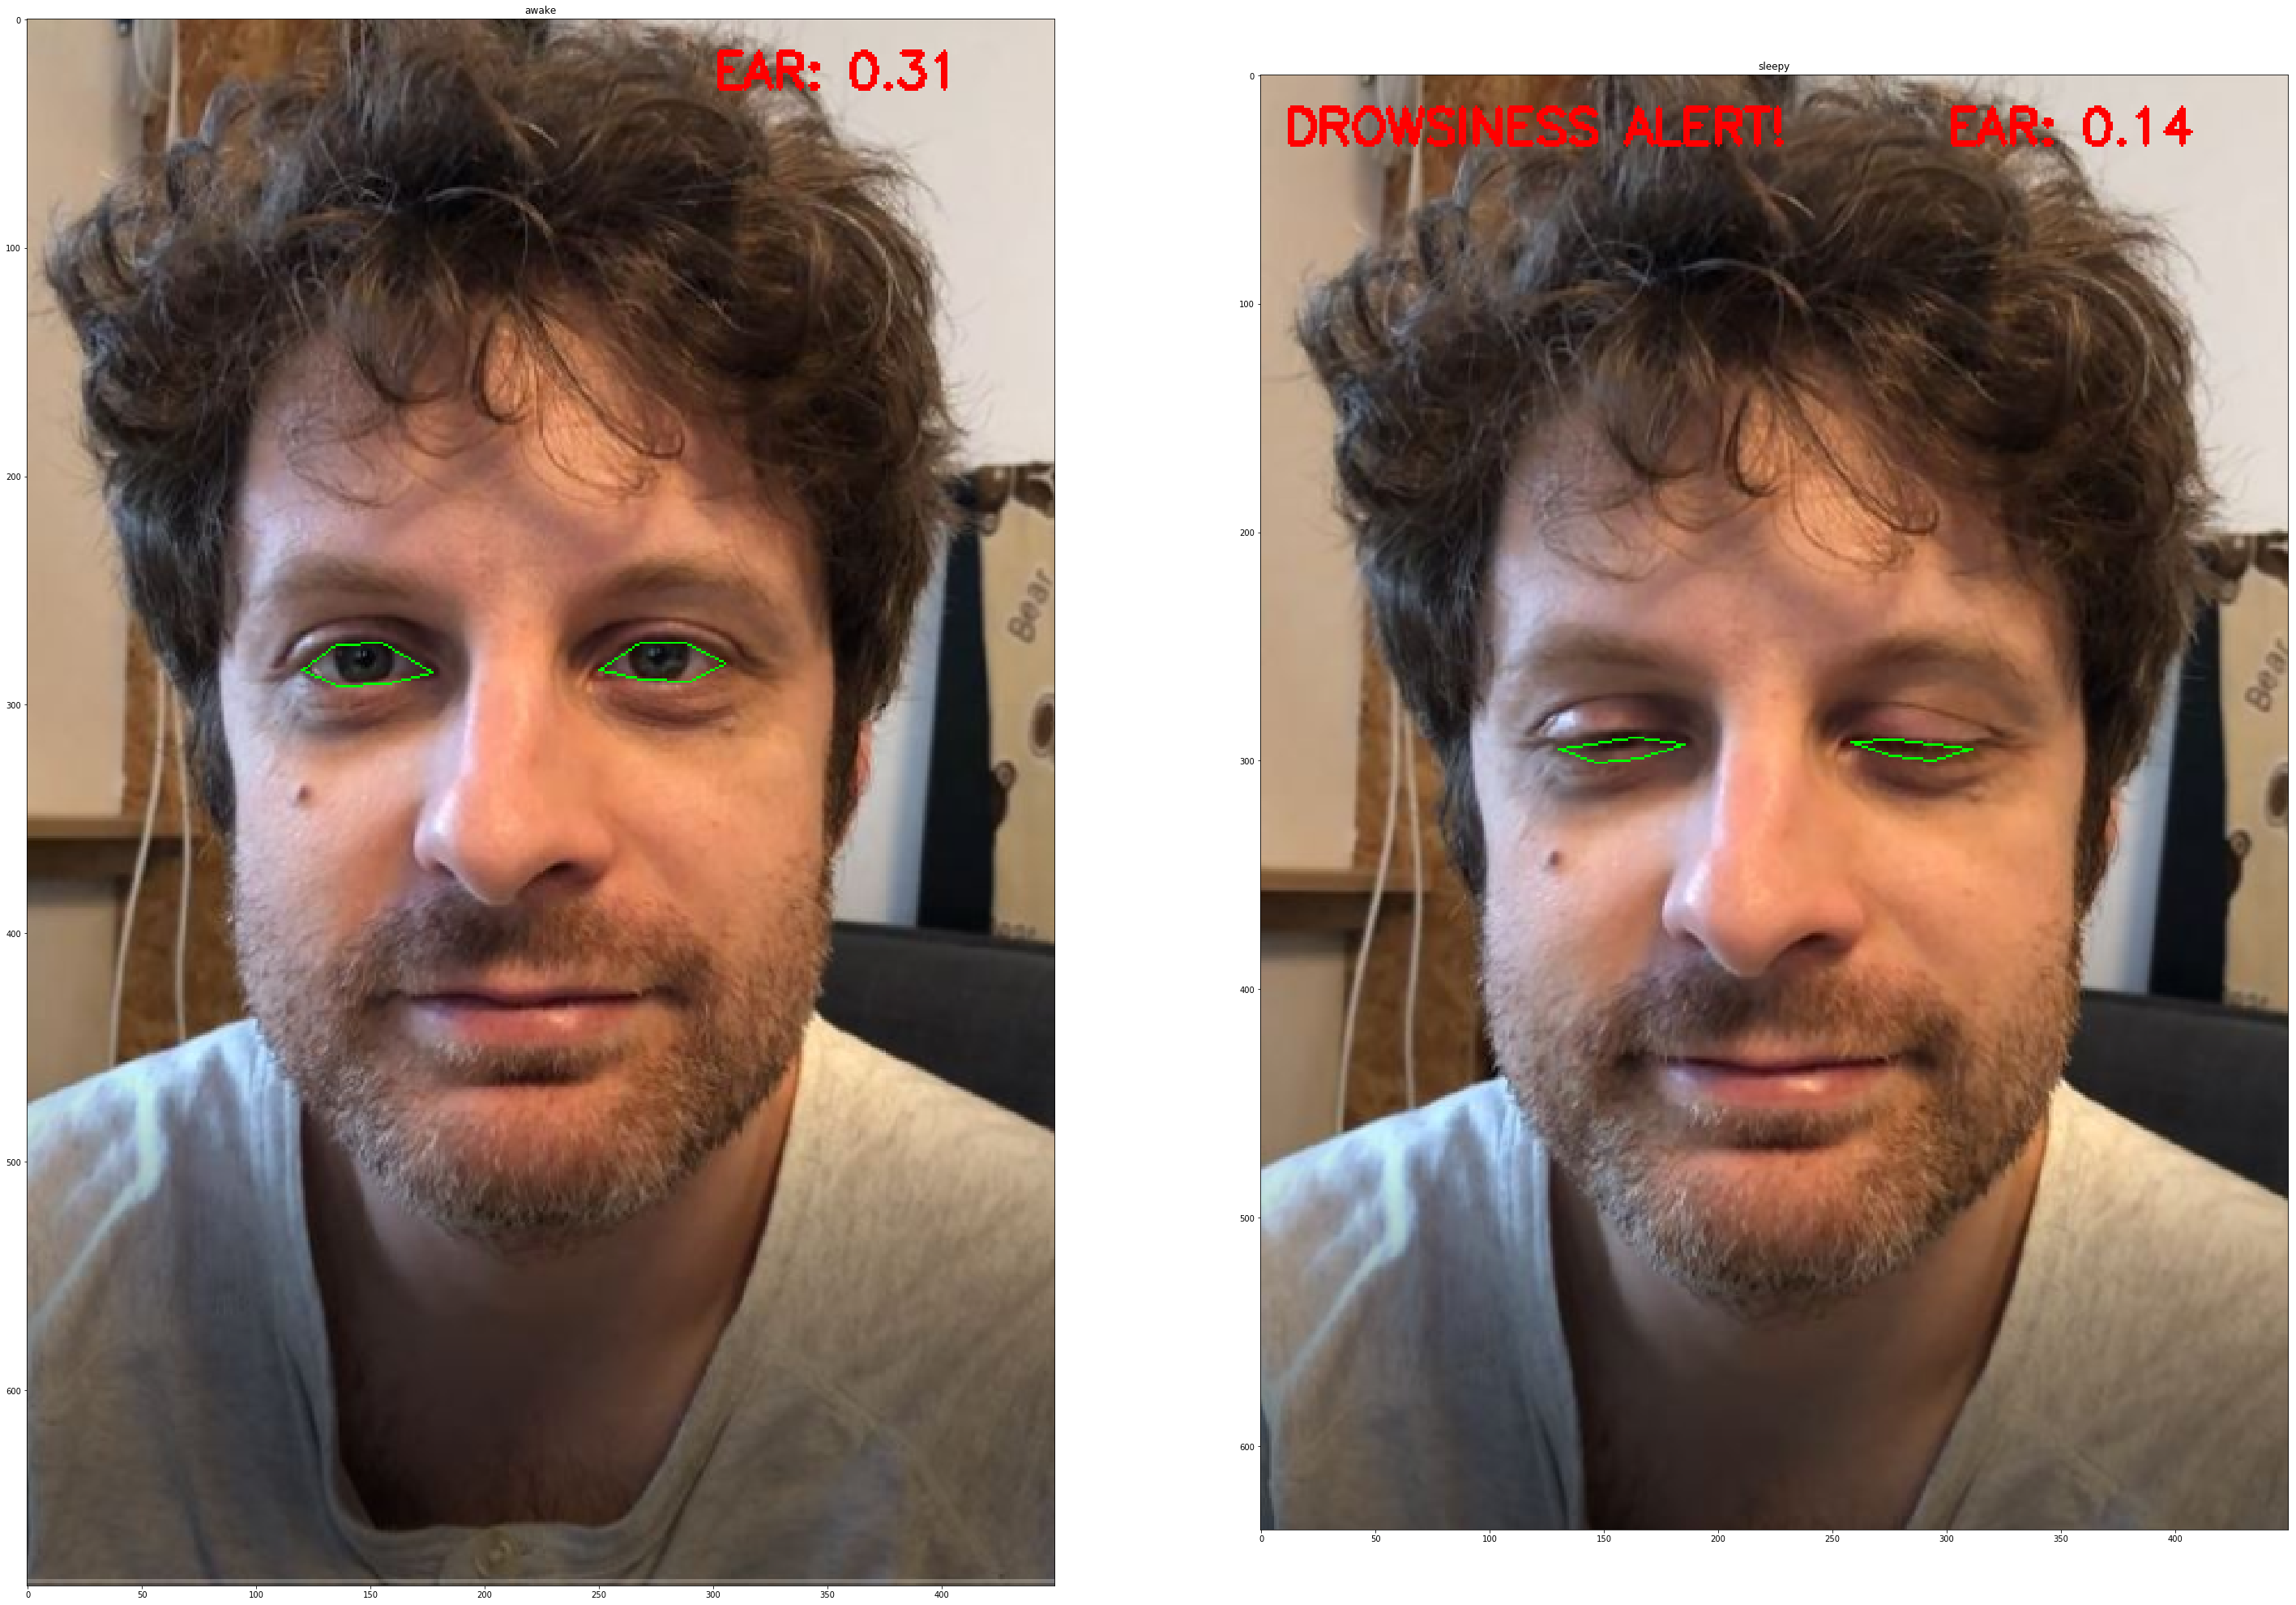

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [50, 50]
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold for to set off the
# alarm
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 30 # it must be more than 30 frames

# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off

awake=drowsyness_detector(image)
sleepy=drowsyness_detector(image2)
#awake = cv2.resize(awake, (400, 400)) 
#sleepy = cv2.resize(sleepy, (400, 400)) 


fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(awake[:,:,[2,1,0]])
a.set_title('awake')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(sleepy[:,:,[2,1,0]])
imgplot.set_clim(0.0, 0.7)
a.set_title('sleepy')


plt.show()

## let's try out a video feed = think realtime camera feed!

In [24]:

EYE_AR_THRESH = 0.18
EYE_AR_CONSEC_FRAMES = 5

# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off
COUNTER = 0
ALARM_ON = False

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

# start the video stream thread
print("[INFO] starting video stream thread...")
#vs = VideoStream(src=args["webcam"]).start()

vs = cv2.VideoCapture('/data/home/zeno/Desktop/drowsiness-detection/sleepyawake.mp4')
sz = (int(vs.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT)))

if (vs.isOpened()==False):
    print("video open error !")
reader = imageio.get_reader('sleepyawake.mp4') # We open the video.
### we construct output video as well
print("frame size",sz)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output3.mp4', fourcc, 20.0, sz)

# loop over frames from the video stream
while vs.isOpened():
    # grab the frame from the threaded video file stream, resize
    # it, and convert it to grayscale
    # channels)
    frame_width = int(vs.get(3))
    frame_height = int(vs.get(4))

    ret, frame = vs.read()
    if ret == True :
        #print("ret is True")
        # construct the output video
        #fps = reader.get_meta_data()['fps'] # We get the fps frequence (frames per second).
        #writer = imageio.get_writer('output.mp4', fps = fps) # We create an output video with this same fps frequence.
        
        frame = imutils.resize(frame, width=450)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces in the grayscale frame
        rects = detector(gray, 0)

        # loop over the face detections
        for rect in rects:
            # determine the facial landmarks for the face region, then
            # convert the facial landmark (x, y)-coordinates to a NumPy
            # array
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            # extract the left and right eye coordinates, then use the
            # coordinates to compute the eye aspect ratio for both eyes
            leftEye = shape[lStart:lEnd]
            rightEye = shape[rStart:rEnd]
            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)

            # average the eye aspect ratio together for both eyes
            ear = (leftEAR + rightEAR) / 2.0

            # compute the convex hull for the left and right eye, then
            # visualize each of the eyes
            leftEyeHull = cv2.convexHull(leftEye)
            rightEyeHull = cv2.convexHull(rightEye)
            cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
            cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

            # check to see if the eye aspect ratio is below the blink
            # threshold, and if so, increment the blink frame counter
            if ear < EYE_AR_THRESH:
                COUNTER += 1

                # if the eyes were closed for a sufficient number of
                # then sound the alarm
                if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        # check to see if an alarm file was supplied,
                        # and if so, start a thread to have the alarm
                        # sound played in the background
                    frame_cnt=int(vs.get(cv2.CAP_PROP_FRAME_COUNT))
                    print("Alert tireness detected how many times {} !".format(str(COUNTER)))

                    # draw an alarm on the frame
                    cv2.putText(frame, "DROWSINESS ALERT {}!".format(str(COUNTER)), (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # otherwise, the eye aspect ratio is not below the blink
            # threshold, so reset the counter and alarm
            else:
                COUNTER = 0
                ALARM_ON = False

            # draw the computed eye aspect ratio on the frame to help
            # with debugging and setting the correct eye aspect ratio
            # thresholds and frame counters
            cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        #frame=cv2.resize(frame,(800, 464))
        #writer.append_data(frame) # We add the next frame in the output video.
        frame = cv2.resize(frame ,sz)
        out.write(frame)
        if COUNTER>=100:
            print("you are too tired , please go to sleep !")
            out.release()
            #writer.close() # We close the process that handles the creation of the output video.
            break
        
        else:
            pass
            




        # show the frame

        #cv2.imshow("Frame", frame)
        #key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        #if key == ord("q"):
            #break
print("finish detection !")
# do a bit of cleanup
#cv2.destroyAllWindows()

vs.release()
#out.release()

[INFO] loading facial landmark predictor...
[INFO] starting video stream thread...
frame size (1080, 1920)
Alert tireness detected how many times 5 !
Alert tireness detected how many times 6 !
Alert tireness detected how many times 7 !
Alert tireness detected how many times 8 !
Alert tireness detected how many times 9 !
Alert tireness detected how many times 10 !
Alert tireness detected how many times 11 !
Alert tireness detected how many times 12 !
Alert tireness detected how many times 13 !
Alert tireness detected how many times 14 !
Alert tireness detected how many times 15 !
Alert tireness detected how many times 16 !
Alert tireness detected how many times 17 !
Alert tireness detected how many times 18 !
Alert tireness detected how many times 19 !
Alert tireness detected how many times 20 !
Alert tireness detected how many times 21 !
Alert tireness detected how many times 22 !
Alert tireness detected how many times 23 !
Alert tireness detected how many times 24 !
Alert tireness det